In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Function Selection

### Ackley Function

$$ f_1: [-32.768, 32.768]^2 \to \mathbb{R} $$

$$ f_1(x, y) = -20 \exp \left( -0.2 \sqrt{0.5 (x^2 + y^2)} \right) - \exp \left( 0.5 (\cos(2\pi x) + \cos(2\pi y)) \right) + e + 20 $$

$$ f1(0, 0) \text{ is the global minimum } $$

---

### Bukin Function N.6

$$ f_2: [-15, 5] \times [-3, 3] \to \mathbb{R} $$

$$ f_2(x, y) = 100 \sqrt{|y - 0.01 x^2| + 0.01 (x + 10)^2} + 0.01 |y + 10| $$

$$ f_2(-10, 1) \text{ is the global minimum } $$




In [9]:
def f1(x, y):
  return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def f2(x, y):
  return 100 * np.sqrt(np.abs(y - 0.01 * x**2) + 0.01 * (x + 10)**2) + 0.01 * np.abs(y + 10)

In [10]:
def plot_2d_contour(f, x_range, y_range, title):
  x = np.linspace(x_range[0], x_range[1], 100)
  y = np.linspace(y_range[0], y_range[1], 100)
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  plt.contour(X, Y, Z, levels=20, cmap='viridis')
  plt.colorbar()

def plot_3d_surface(f, x_range, y_range, title):
  x = np.linspace(x_range[0], x_range[1], 100)
  y = np.linspace(y_range[0], y_range[1], 100)
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis')


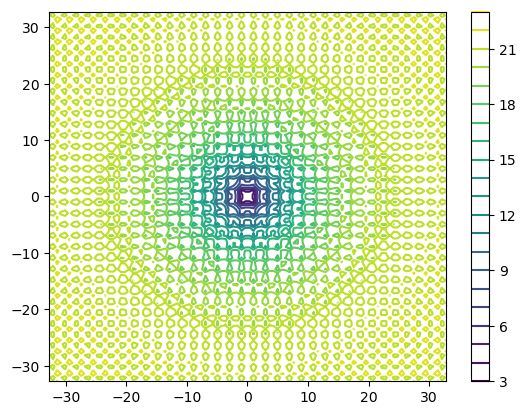

In [11]:
plot_2d_contour(f1, [-32.768, 32.768], [-32.768, 32.768], 'Ackley Function')



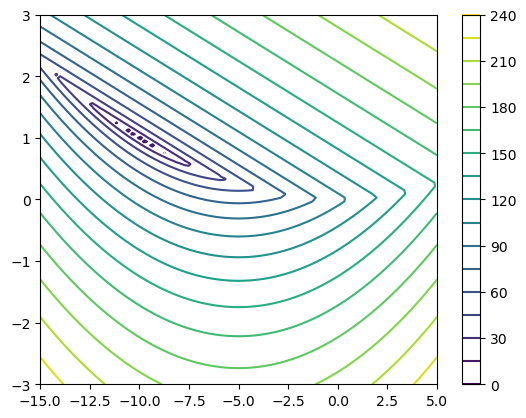

In [12]:
plot_2d_contour(f2, [-15, 5], [-3, 3], 'Bukin Function N.6')


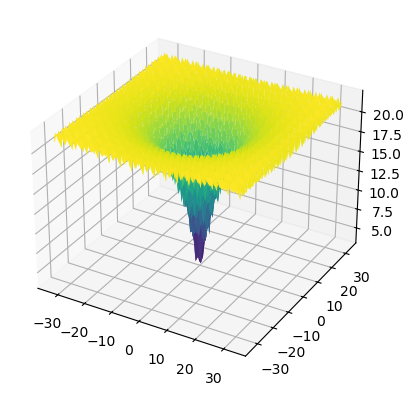

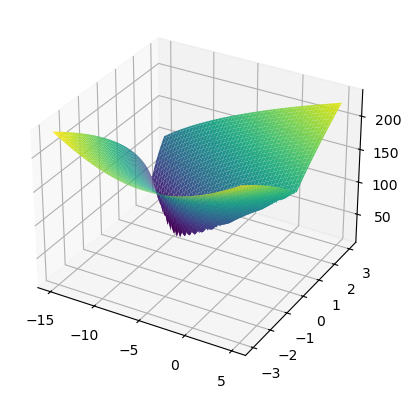

In [13]:
plot_3d_surface(f1, [-32.768, 32.768], [-32.768, 32.768], 'Ackley Function')
plot_3d_surface(f2, [-15, 5], [-3, 3], 'Bukin Function N.6')

In [14]:
def setup_population(pop_size, dim, lower_bound, upper_bound):
  return np.random.uniform(lower_bound, upper_bound, (pop_size, dim))

def evaluate_population(population, f):
  return np.array([f(individual) for individual in population])

In [15]:
ackley_population = setup_population(100, 2, [-32.768, -32.768], [32.768, 32.768])
bukin_population = setup_population(100, 2, [-15, -3], [5, 3])

In [16]:
def ackley(x):
  a = 20
  b = 0.2
  c = 2 * np.pi
  d = len(x)
  sum1 = np.sum(x**2)
  sum2 = np.sum(np.cos(c * x))
  return -a * np.exp(-b * np.sqrt(sum1 / d)) - np.exp(sum2 / d) + a + np.exp(1)


In [17]:
# https://www.geeksforgeeks.org/tournament-selection-ga/
def tournament_selection(population, fitness, tournament_size=2):
  selected = []
  for _ in range(len(population)):
    candidates = np.random.choice(len(population), tournament_size, replace=False)
    best_candidate = candidates[np.argmin(fitness[candidates])]
    selected.append(best_candidate)
  return selected




In [18]:
tournament_selection(ackley_population, evaluate_population(ackley_population, ackley))

[21,
 45,
 37,
 92,
 37,
 23,
 78,
 46,
 6,
 28,
 15,
 64,
 96,
 66,
 26,
 78,
 96,
 46,
 16,
 43,
 35,
 67,
 2,
 40,
 23,
 34,
 42,
 73,
 16,
 24,
 76,
 87,
 37,
 96,
 85,
 88,
 27,
 86,
 22,
 16,
 66,
 27,
 34,
 5,
 26,
 74,
 29,
 63,
 88,
 2,
 93,
 61,
 25,
 6,
 93,
 25,
 0,
 62,
 23,
 2,
 25,
 40,
 34,
 36,
 57,
 65,
 67,
 37,
 14,
 39,
 20,
 16,
 16,
 92,
 10,
 14,
 62,
 78,
 73,
 5,
 6,
 95,
 22,
 92,
 52,
 27,
 8,
 21,
 5,
 31,
 2,
 66,
 61,
 53,
 86,
 96,
 74,
 28,
 60,
 60]

In [19]:
def child(p1, p2, alpha=0.5):
  return alpha * p1 + (1 - alpha) * p2

In [20]:
def gaussian_mutation(individual, mutation_rate=0.1, sigma=0.1):
  return individual + np.random.normal(0, sigma, len(individual)) * mutation_rate

In [25]:
def run_ackley():
  pop_size = 100
  dim = 2
  lower_bound = [-32.768, -32.768]
  upper_bound = [32.768, 32.768]
  generations = 100

  population = setup_population(pop_size, dim, lower_bound, upper_bound)

  for gen in range(generations):
    fitness = evaluate_population(population, ackley)

    parents = tournament_selection(population, fitness)
    children = []
    for _ in range(pop_size // 2):
      p1 = population[parents[0]]
      p2 = population[parents[1]]
      mezo = child(p1, p2)
      mezo = gaussian_mutation(mezo)
      children.append(mezo)

    population = np.array(children)

  final_fitness = evaluate_population(population, ackley)
  best_idx = np.argmin(final_fitness)
  print(f"Best individual: {population[best_idx]}")
  print(f"Best fitness: {final_fitness[best_idx]}")

  return population[best_idx], final_fitness[best_idx]



In [30]:
run_ackley()

Best individual: [-11.99988583  25.00134095]
Best fitness: 19.603979263367332


(array([-11.99988583,  25.00134095]), 19.603979263367332)

In [31]:
def bukin(x):
  return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2) + 0.01 * (x[0] + 10)**2) + 0.01 * np.abs(x[1] + 10)


In [33]:
def run_bukin():
  pop_size = 100
  dim = 2
  lower_bound = [-15, -3]
  upper_bound = [5, 3]
  generations = 100

  population = setup_population(pop_size, dim, lower_bound, upper_bound)

  for gen in range(generations):
    fitness = evaluate_population(population, bukin)

    parents = tournament_selection(population, fitness)

    children = []
    for _ in range(pop_size // 2):
      p1 = population[parents[0]]
      p2 = population[parents[1]]
      mezo = child(p1, p2)
      mezo = gaussian_mutation(mezo)
      children.append(mezo)

    population = np.array(children)

  final_fitness = evaluate_population(population, bukin)
  best_idx = np.argmin(final_fitness)
  print(f"Best individual: {population[best_idx]}")
  print(f"Best fitness: {final_fitness[best_idx]}")

  return population[best_idx], final_fitness[best_idx]


In [36]:
run_bukin()

Best individual: [-8.59251079  0.60413975]
Best fitness: 39.34669962144079


(array([-8.59251079,  0.60413975]), 39.34669962144079)